# Make global data available as pandas data frame

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

In [1]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (8, 6)   # need bigger size otherwise xlabels are cut-off in svg files

In [2]:
import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')


def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#
def fetch_data(names = ['confirmed', 'deaths']):
    """Return 3 data frames:
    [confirmed, deaths], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_covid19_" + name + "_global.csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs



In [3]:
# (confirmed, deaths, recovered), location_infos = fetch_data()
confirmed, deaths = fetch_data()

confirmed : last data point from 2020-03-27 00:00:00
deaths    : last data point from 2020-03-27 00:00:00


In [4]:
# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00
Country/Region,,,,,,,,
Italy,4032,4825,5476,6077,6820,7503,8215,9134
Spain,1043,1375,1772,2311,2808,3647,4365,5138
China,3133,3139,3153,3153,3160,3163,3169,3174
Iran,1433,1556,1685,1812,1934,2077,2234,2378
France,450,562,674,860,1100,1331,1696,1995
US,244,307,417,557,706,942,1209,1581
United Kingdom,177,233,281,335,422,465,578,759
Netherlands,106,136,179,213,276,356,434,546
Germany,67,84,94,123,157,206,267,342


In [5]:
deaths.describe()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,...,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.068273,0.072289,0.104418,0.168675,0.224900,0.329317,0.526104,0.534137,0.686747,0.855422,...,35.072289,39.626506,45.377510,52.100402,58.839357,66.285141,74.799197,85.064257,96.265060,109.228916
std,1.077331,1.078938,1.523056,2.535964,3.296752,4.817222,7.921510,7.921989,10.266522,12.927652,...,284.278265,307.679074,342.127762,387.752366,429.889003,473.801267,526.636872,586.324407,648.648777,724.792679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,5.000000,6.000000,6.000000
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,...,3122.000000,3405.000000,4032.000000,4825.000000,5476.000000,6077.000000,6820.000000,7503.000000,8215.000000,9134.000000


Available countries:

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
confirmed.sort_values(by=confirmed.columns[-1], ascending=False).iloc[0:10,-8:]

,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00
Country/Region,,,,,,,,
US,19100,25489,33276,43847,53740,65778,83836,101657
Italy,47021,53578,59138,63927,69176,74386,80589,86498
China,67800,67800,67800,67800,67801,67801,67801,67801
Spain,20410,25374,28768,35136,39885,49515,57786,65719
Germany,19848,22213,24873,29056,32986,37323,43938,50871
France,12612,14282,16018,19856,22304,25233,29155,32964
Iran,19644,20610,21638,23049,24811,27017,29406,32332
United Kingdom,3983,5018,5683,6650,8077,9529,11658,14543
Switzerland,5294,6575,7474,8795,9877,10897,11811,12928


# Pick one country

In [8]:
country = "Germany"
# country = "San Marino"
# country = "United Kingdom"
# country = "Italy"

In [9]:
# create one DataFrame for country/region
c_df = pd.DataFrame()
if country == "United Kingdom":
    # UK has three Provinces: Channel Islands, Gibraltar and UK. Only need last one
    c_df['confirmed'] = confirmed.loc[country].drop('Province/State', axis=1).iloc[2]
    c_df['deaths'] = deaths.loc[country].drop('Province/State', axis=1).iloc[2]
else:
    c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
    c_df['deaths'] = deaths.loc[country].drop('Province/State')

c_df.index = string_to_date(c_df.index)

In [10]:
c_df.country = country  # remember which country we work on, just in case
c_df.tail()

,confirmed,deaths
2020-03-23,29056,123
2020-03-24,32986,157
2020-03-25,37323,206
2020-03-26,43938,267
2020-03-27,50871,342


In [11]:
## Only cases since 25 Feb, set all values to zero for that day
c2_df = c_df['2020-02-25':] - c_df.loc['2020-02-25']
c2_df

,confirmed,deaths
2020-02-25,0,0
2020-02-26,10,0
2020-02-27,29,0
2020-02-28,31,0
2020-02-29,62,0
2020-03-01,113,0
2020-03-02,142,0
2020-03-03,179,0
2020-03-04,245,0
2020-03-05,465,0


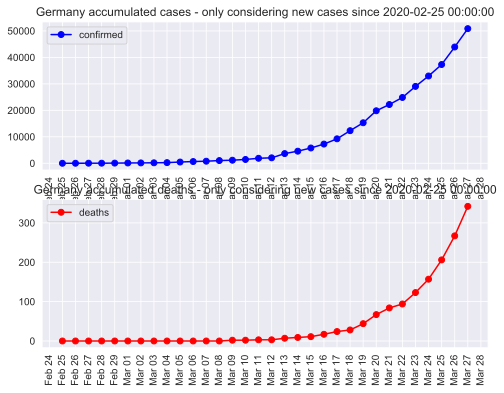

In [12]:
fig, axes = plt.subplots(2, 1, figsize=figsize)
set_date_formatting(axes[0])
set_date_formatting(axes[1])
axes[0].plot(c2_df.index, c2_df['confirmed'], 'o-b', label='confirmed')
axes[1].plot(c2_df.index, c2_df['deaths'], 'o-r', label='deaths')
axes[0].legend()
axes[1].legend()
axes[0].set_title(country + " accumulated cases - only considering new cases since " + str(min(c2_df.index)));
axes[1].set_title(country + " accumulated deaths - only considering new cases since " + str(min(c2_df.index)));
fig.savefig("figures/germany-overview-25-feb.svg")

# Compute some derived entities

In [13]:
# Compute day-to-day increases
c_df['new_confirmed'] = c_df['confirmed'].diff()
c_df['new_deaths'] = c_df['deaths'].diff()
c_df['pct-confirmed'] = c_df['confirmed'].pct_change()
c_df['pct-deaths'] = c_df['deaths'].pct_change()
c_df.tail(20)

,confirmed,deaths,new_confirmed,new_deaths,pct-confirmed,pct-deaths
2020-03-08,1040,0,241,0,0.301627,NaN
2020-03-09,1176,2,136,2,0.130769,inf
2020-03-10,1457,2,281,0,0.238946,0.000000
2020-03-11,1908,3,451,1,0.309540,0.500000
2020-03-12,2078,3,170,0,0.089099,0.000000
2020-03-13,3675,7,1597,4,0.768527,1.333333
2020-03-14,4585,9,910,2,0.247619,0.285714
2020-03-15,5795,11,1210,2,0.263904,0.222222
2020-03-16,7272,17,1477,6,0.254875,0.545455
2020-03-17,9257,24,1985,7,0.272965,0.411765


In [14]:
c2_df['days-td'] = c2_df.index - c2_df.index.min()  # days as TimeDelta type
c2_df['days'] = c2_df['days-td'].astype("timedelta64[D]").astype(float)

In [15]:
c2_df

,confirmed,deaths,days-td,days
2020-02-25,0,0,0 days,0.0
2020-02-26,10,0,1 days,1.0
2020-02-27,29,0,2 days,2.0
2020-02-28,31,0,3 days,3.0
2020-02-29,62,0,4 days,4.0
2020-03-01,113,0,5 days,5.0
2020-03-02,142,0,6 days,6.0
2020-03-03,179,0,7 days,7.0
2020-03-04,245,0,8 days,8.0
2020-03-05,465,0,9 days,9.0


In [16]:
def model_par(t0=None, p=None, c=None, a0=None):
    """Just to order parameters into tuple for curve_fit call"""
    return t0, p, c, a0

def model(t, t0, p, c, a0):
    """Simple model"""
    
    return c*(t-t0)**p + a0 

def pretty_params(param, end="\n"):
    t0, p, c, a0 = param
    s = "p = {:.3f}".format(p) + end
    s += "c = {:.3g}".format(c) + end
    s += "t0= {:.3f}".format(t0) + end
    s += "a0= {:.3f}".format(a0)
    return s

def day_to_date(day, day0=pd.datetime(year=2020, month=1, day=21)):
    """Given the day from day0 (21 Jan 2020), return the data as a string.
    Example output: '26 Jan 2020'
    
    Needed to obtain days for predictions into the future, which are not given in our data frame 'data' yet.
    """
    assert isinstance(day, (int, float)), day
    
    # Compute date
    date = day0 + pd.Timedelta(day, "D")
    # format nicely
    s = date.strftime("%d %b %Y")
    return s

/Users/fangohr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [17]:
# deselect data points if necessary to find working fit parameters
# tmp = c2_df.drop(c2_df.index[17]).drop(c2_df.index[16])
# tmp = c2_df.drop(c2_df.index[17])
tmp = c2_df

In [18]:
p0 = model_par(t0=0, p=2.7, c=1.4, a0=5)   # guess initial values for fit parameters, doesn't work 13 March
p0 = model_par(t0=0, p=2, c=1.4, a0=5)   # guess initial values for fit parameters
p0 = model_par(t0=0, p=4, c=0.02, a0=5)   # guess initial values for fit parameters


days = tmp['days']
infections = tmp['confirmed']

param_infections, cov_infections = \
    scipy.optimize.curve_fit(model, days, 
                             infections, 
                             p0=p0)

In [19]:
#param_infections = p0   # use to debug if p0 was not good guess
t0, p, c, a0 = param_infections


fitted_infections = model(c2_df['days'], t0, p, c, a0)
print(pretty_params(param_infections))

p = 4.124
c = 0.036
t0= -0.000
a0= -134.534


In [20]:
# Estimated standard deviation of parameters
print("Uncertainties for fit parameters:")
with np.printoptions(precision=2, suppress=True):
    print(pretty_params(np.sqrt(cov_infections.diagonal())))

Uncertainties for fit parameters:
p = 0.117
c = 0.017
t0= 0.863
a0= 207.474


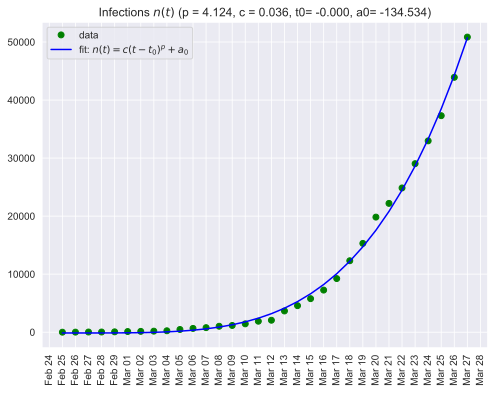

In [21]:
c2_df['date'] = c2_df.index
fig, ax = plt.subplots(figsize=figsize)
ax.plot(c2_df['date'], c2_df['confirmed'], 'og')
ax.plot(c2_df['date'], fitted_infections, '-b')
ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
fig.savefig('figures/infections-with-model-fit.svg')

In [22]:
# write model parameters to file
parameter_file = f"figures/{country}-model-parameters.txt"
# create empty file if it doesn't exist
open(parameter_file, 'at').close()
t0, p, c, a0 = param_infections
fitted_infections = model(days, t0, p, c, a0)
# check if we have entry for this date
date = max(c2_df.index).date().isoformat()
# have we written data based on 'date' to the file already?
if date in open(parameter_file, "r").read():
    print(f"Already entry for {date} in {parameter_file}")
else:
    with open(parameter_file, "ta") as f:
        s = f"{date}: {pretty_params(param_infections, end=', ')}"
        print(s)
        f.write(s + "\n")

2020-03-27: p = 4.124, c = 0.036, t0= -0.000, a0= -134.534


In [23]:
!cat figures/germany-model-parameters.txt

2020-03-11: p = 2.908, c = 0.661, t0= -0.257, a0= 9.350
2020-03-12: p = 2.711, c = 1.15, t0= -0.000, a0= 3.335
2020-03-13: p = 2.423, c = 3.05, t0= -0.000, a0= -117.677
2020-03-14: p = 2.452, c = 3.22, t0= -0.000, a0= -191.766

2020-03-16: p = 4.157, c = 0.0272, t0= -0.000, a0= 42.739
2020-03-19: p = 4.181, c = 0.0291, t0= -0.000, a0= -111.532
2020-03-21: p = 3.980, c = 0.0582, t0= -0.015, a0= -278.458
2020-03-22: p = 4.187, c = 0.0304, t0= -0.000, a0= -223.770
2020-03-23: p = 4.107, c = 0.0372, t0= -0.000, a0= -107.668
2020-03-25: p = 4.139, c = 0.0343, t0= -0.000, a0= -127.289
2020-03-27: p = 4.124, c = 0.036, t0= -0.000, a0= -134.534


# Predictions for confirmed cases

In [24]:
with open("figures/germany-predicted-infections.txt", "tw") as f:
    f.write(f"Predictions for cases in {c_df.country}:\n\n")
    f.write(f"Last data point used in prediction from {max(c2_df.index)}\n\n")
    for future_days in range(1, 30):
        d = int(max(c2_df['days'])) + future_days
        f.write(f"Infections in {future_days:2} days: " +
              f"{int(round(model(d, c=c, t0=t0, p=p, a0=a0))):6}" +
              f" ({day_to_date(d, min(c2_df.index))})\n")
        
        
        
    f.write(f"\nFit parameters: {pretty_params(param_infections, end=' ')}")
!cat figures/germany-predicted-infections.txt

Predictions for cases in Germany:

Last data point used in prediction from 2020-03-27 00:00:00

Infections in  1 days:  57833 (28 Mar 2020)
Infections in  2 days:  65676 (29 Mar 2020)
Infections in  3 days:  74297 (30 Mar 2020)
Infections in  4 days:  83748 (31 Mar 2020)
Infections in  5 days:  94082 (01 Apr 2020)
Infections in  6 days: 105351 (02 Apr 2020)
Infections in  7 days: 117614 (03 Apr 2020)
Infections in  8 days: 130927 (04 Apr 2020)
Infections in  9 days: 145350 (05 Apr 2020)
Infections in 10 days: 160944 (06 Apr 2020)
Infections in 11 days: 177773 (07 Apr 2020)
Infections in 12 days: 195902 (08 Apr 2020)
Infections in 13 days: 215396 (09 Apr 2020)
Infections in 14 days: 236324 (10 Apr 2020)
Infections in 15 days: 258757 (11 Apr 2020)
Infections in 16 days: 282765 (12 Apr 2020)
Infections in 17 days: 308424 (13 Apr 2020)
Infections in 18 days: 335808 (14 Apr 2020)
Infections in 19 days: 364994 (15 Apr 2020)
Infections in 20 days: 396062 (16 Apr 2020)
Infections in 21 days: 4

In [25]:
def insert(what, towhere, tag):
    """Insert table into README.md"""
    # backup original
    cmd = f"cp -vf {towhere} tmp-backup.txt"
    os.system(cmd)
    with open(towhere, "tw") as f_out:
        with open("tmp-backup.txt", "tr") as f_in:
            for line in f_in:
                f_out.write(line)
                if tag in line:
                    f_out.write("<pre>\n")
                    with open(what, "rt") as f_table:
                        for line2 in f_table:
                            f_out.write(line2)
                    # end towhere file here
                    f_out.write("</pre>\n")
                    break
                else:
                    pass
    os.system("rm -f tmp-backup.txt")
                    



insert("figures/germany-predicted-infections.txt", "README.md", tag="[comment]: <> insert table here")

## How long does it take for the number of infections to double?

- in the news, we had 6.4 days (with the recent [Lancet paper](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext) given as the reference)

- based on $n(t') =  2n(t)$, we find $$t' = \left((2(t-t_0)^p+\frac{a_0}{c}\right)^\frac{1}{p} + t_0$$

- the time for infections or deaths to double is thus given by $t' - t$, and we can implement the above equation:

In [26]:
# def time_to_double(t, t0, p, a0, c):
def time_to_double(t, c, t0, p, a0):
    tprime = (2*(t - t0)**p + a0/c)**(1/p) + t0
    return tprime - t

In [42]:
day = max(c2_df['days'])
for d in range(3, 50, 2):
    print(f"at day {d:.0f} ({day_to_date(d, min(c2_df.index))}), the time to double n is {time_to_double(d, c, t0, p, a0):.1f} days")

at day 3 (28 Feb 2020), the time to double n is nan days
at day 5 (01 Mar 2020), the time to double n is nan days
at day 7 (03 Mar 2020), the time to double n is -0.4 days
at day 9 (05 Mar 2020), the time to double n is 1.0 days
at day 11 (07 Mar 2020), the time to double n is 1.7 days
at day 13 (09 Mar 2020), the time to double n is 2.2 days
at day 15 (11 Mar 2020), the time to double n is 2.6 days
at day 17 (13 Mar 2020), the time to double n is 3.0 days
at day 19 (15 Mar 2020), the time to double n is 3.4 days
at day 21 (17 Mar 2020), the time to double n is 3.8 days
at day 23 (19 Mar 2020), the time to double n is 4.2 days
at day 25 (21 Mar 2020), the time to double n is 4.6 days
at day 27 (23 Mar 2020), the time to double n is 4.9 days
at day 29 (25 Mar 2020), the time to double n is 5.3 days
at day 31 (27 Mar 2020), the time to double n is 5.7 days
at day 33 (29 Mar 2020), the time to double n is 6.0 days
at day 35 (31 Mar 2020), the time to double n is 6.4 days
at day 37 (02 Apr

/Users/fangohr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


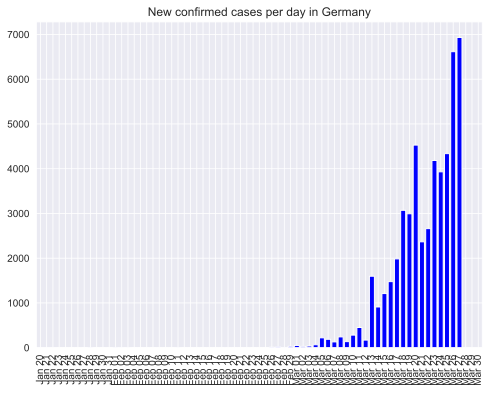

In [28]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_confirmed'], color='b')
set_date_formatting(ax)
ax.set_title(f"New confirmed cases per day in {c_df.country}")
fig.savefig(f'figures/new-cases-{c_df.country}.svg')

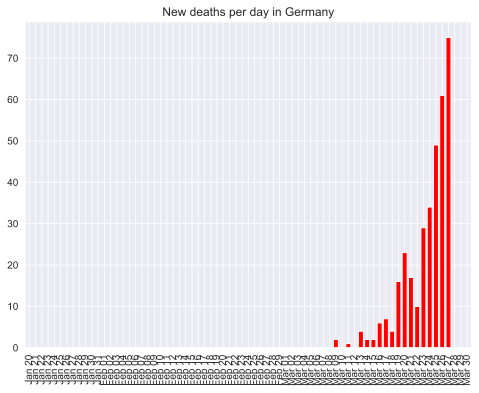

In [29]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_deaths'], color='r')
set_date_formatting(ax)
ax.set_title(f"New deaths per day in {c_df.country}")
fig.savefig(f'figures/new-deaths-{c_df.country}.svg')

# Look at some world wide data

In [30]:
# global data
glob = pd.DataFrame()
glob['deaths'] = deaths.sum(axis=0)
glob['confirmed'] = confirmed.sum(axis=0)
glob.index = string_to_date(glob.index)

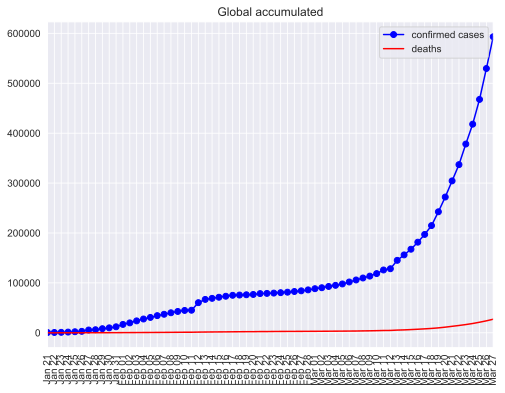

In [31]:
fig, ax = plt.subplots(figsize=figsize)
glob['confirmed'].plot(kind='line', style='-ob', ax=ax)
glob['deaths'].plot(kind='line', style='-r', ax=ax)
set_date_formatting(ax)
ax.legend(['confirmed cases', 'deaths'])
ax.set_title("Global accumulated");
fig.savefig('figures/global-overview.svg')

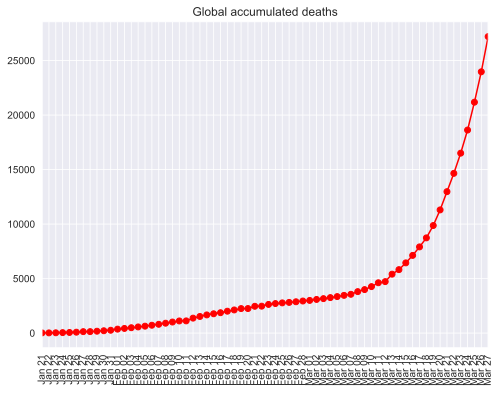

In [32]:
fig, ax = plt.subplots(figsize=figsize)
glob['deaths'].plot(kind='line', style='o-r', ax=ax)
set_date_formatting(ax)
ax.set_title("Global accumulated deaths");
fig.savefig("figures/global-deaths.svg")

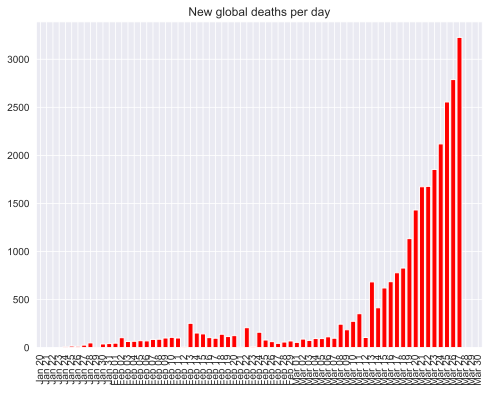

In [33]:
glob['new-deaths'] = glob['deaths'].diff()
glob['new-confirmed'] = glob['confirmed'].diff()

fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-deaths'], color='r' )
set_date_formatting(ax)
ax.set_title("New global deaths per day")
fig.savefig('figures/global-new-deaths.svg');

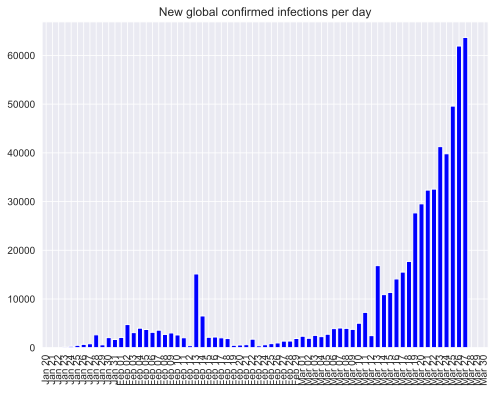

In [34]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-confirmed'], color='b')
set_date_formatting(ax)
ax.set_title("New global confirmed infections per day");
fig.savefig('figures/global-new-infections.svg');

# Any common behaviour in growth of infections?

In [35]:
# reduce to only countries with more than ncase cases
ncase = 5000
c3 = confirmed[confirmed.sum(axis=1) > ncase]
c3 = c3.drop('Province/State', axis=1)
print(f"Found {len(c3)} data sets with more than {ncase} infections")

Found 74 data sets with more than 5000 infections


In [36]:

norm = c3.sum(axis=1)

In [37]:
c4 = c3.div(norm, axis='index')
c4 = c3

In [38]:
c4.sum(axis=1)
mainland_china = c4.loc['China'].sum()
c5 = c4.drop('China')  # remove the long list of regions in China
# but add summary for China (sum over all regions, then normalised)
#c5.loc['Mainland China (sum)'] = mainland_china/mainland_china.sum()
c5.loc['China (sum)'] = mainland_china

print(f"{len(c5)} data sets remaining after removing regions in China")

49 data sets remaining after removing regions in China


/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
c5.iloc[:,-10:].sort_values(by=c5.columns[-1], ascending=False)

,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00
Country/Region,,,,,,,,,,
US,7783,13677,19100,25489,33276,43847,53740,65778,83836,101657
Italy,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498
China (sum),80749,80801,80895,80949,81073,81136,81228,81290,81397,81507
Spain,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719
Germany,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871
France,9043,10871,12612,14282,16018,19856,22304,25233,29155,32964
Iran,17361,18407,19644,20610,21638,23049,24811,27017,29406,32332
United Kingdom,2626,2689,3983,5018,5683,6650,8077,9529,11658,14543
Switzerland,3028,4075,5294,6575,7474,8795,9877,10897,11811,12928


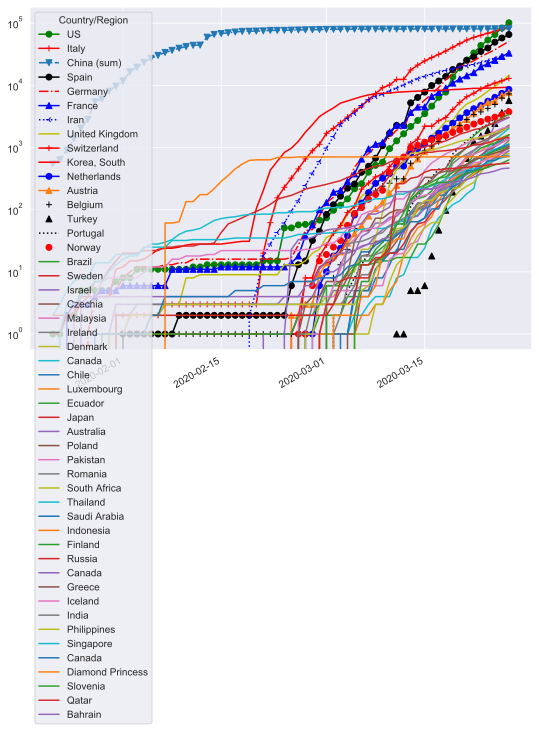

In [40]:
fig, ax = plt.subplots(figsize=(9,7))
styles = ['-og', '+-r', 'v-.', '-ko', '-.r', 'b-^', ':b3', '-y', '-r+', 'r-', '-bo', '^-', 'k+', 'k^', 'k:', 'ro']
c5.sort_values(by=c5.columns[-1], ascending=False).T.plot(ax=ax, style=styles)
ax.set_yscale('log')

# Some countries in Europe


In [41]:
countries = ['Italy', 'France', 'Spain', 'Germany', 'Finland', 'UK', 'Sweden', 'Belgium', 'Croatia', 'Norway', 'Netherlands', 'Iceland']
styles = ['-og', '+-r', 'v-.', '-ok', '-g', 'b-^', ':y', '-y', '-r+', 'g-', '-bo', '^-']
eu_deaths = deaths.loc[countries].T
eu_deaths.drop('Province/State', inplace=True)
eu_cases = confirmed.loc[countries].T
eu_cases.drop('Province/State', inplace=True)

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [ ]:
eu_deaths.tail()

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
eu_deaths.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Deaths in some European countries (log scale)");

In [ ]:
eu_cases.tail()

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
eu_cases.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Confirmed infections in some European countries (log scale)");


In [ ]:
fig, ax = plt.subplots(figsize=figsize)
eu_cases.plot(kind='line', ax=ax, style=styles)
ax.legend(loc="lower left")
ax.set_title("Confirmed infections in some European countries");